<a href="https://colab.research.google.com/github/Raj3049/Book-Recommender-System/blob/main/Book_recommender_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
books = pd.read_csv('/content/Books.csv')
users = pd.read_csv('/content/Users.csv')
ratings = pd.read_csv('/content/Ratings.csv')

<ipython-input-37-b5b697c12c7c>:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('/content/Books.csv')


In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
books = books[['ISBN','Book-Title','Book-Author','Year-Of-Publication','Publisher']]
books.rename(columns = {'Book-Title':'title','Book-Author':'author','Year-Of-Publication':'year','Publisher':'publisher'},inplace=True)
books.head()

<ipython-input-5-fe02df0ee6a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books.rename(columns = {'Book-Title':'title','Book-Author':'author','Year-Of-Publication':'year','Publisher':'publisher'},inplace=True)


,ISBN,title,author,year,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [ ]:
users.head()


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
users.rename(columns = {'User-ID':'user_id','Location':'location','Age':'age'},inplace=True)
users.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
ratings.rename(columns = {'User-ID':'user_id','Book-Rating':'rating'},inplace=True)
ratings.head()

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 5)
(1149780, 3)
(278858, 3)


In [ ]:
x=ratings['user_id'].value_counts()>200


In [ ]:
x[x]

,count
user_id,
11676,True
198711,True
153662,True
98391,True
35859,True
...,...
274808,True
28634,True
59727,True


In [ ]:
y=x[x].index
y

Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352, 110973,
       235105,
       ...
       260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727, 268622,
       188951],
      dtype='int64', name='user_id', length=899)

In [ ]:
ratings = ratings[ratings['user_id'].isin(y)]
ratings.shape

(526356, 3)

In [ ]:
ratings_with_books = ratings.merge(books,on='ISBN')
ratings_with_books.shape

(487671, 7)

In [ ]:
number_rating = ratings_with_books.groupby('title')['rating'].count().reset_index()
number_rating.rename(columns = {'rating':'number_of_ratings'},inplace=True)
number_rating

,title,number_of_ratings
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
160264,Ã?Â?ber die Pflicht zum Ungehorsam gegen den S...,3
160265,Ã?Â?lpiraten.,1
160266,Ã?Â?rger mit Produkt X. Roman.,1
160267,Ã?Â?stlich der Berge.,1


In [ ]:
final_rating = ratings_with_books.merge(number_rating,on='title')
final_rating.shape

(487671, 8)

In [ ]:
final_rating = final_rating[final_rating['number_of_ratings']>=50]
final_rating.shape

(61853, 8)

In [ ]:
final_rating.drop_duplicates(['user_id','title'],inplace=True)
final_rating.shape

(59850, 8)

In [ ]:
book_pivot = final_rating.pivot_table(columns='user_id',index='title',values='rating')
book_pivot.fillna(0,inplace=True)
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from scipy.sparse import csr_matrix
book_sparse = csr_matrix(book_pivot)
type(book_sparse)

scipy.sparse._csr.csr_matrix

In [ ]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute')
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [ ]:
distances,suggestions = model.kneighbors(book_pivot.iloc[237,:].values.reshape(1,-1),n_neighbors=6)
suggestions

array([[237, 238, 240, 241, 184, 536]])

In [ ]:
for i in range(len(suggestions)):
  print(book_pivot.index[suggestions[i]])

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive',
       'The Cradle Will Fall'],
      dtype='object', name='title')


In [ ]:
book_pivot.index[54]

'Animal Farm'

In [ ]:
np.where(book_pivot.index=='Animal Farm')[0][0]

54

In [ ]:
def recommend_book(book_name):
  book_id = np.where(book_pivot.index==book_name)[0][0]
  distances,suggestions = model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1),n_neighbors=6)

  for i in range(len(suggestions)):
    if i==0:
      print("The suggestions for",book_name,"are:")
    if not i:
      print(book_pivot.index[suggestions[i]])

In [ ]:
recommend_book('Animal Farm')

The suggestions for Animal Farm are:
Index(['Animal Farm', 'Exclusive', 'Jacob Have I Loved', 'Second Nature',
       'Pleading Guilty', 'No Safe Place'],
      dtype='object', name='title')


In [ ]:
6i3g3mport pandas as pd
import numpy as np
books = pd.read_csv('/content/Books.csv')
users = pd.read_csv('/content/Users.csv')
ratings = pd.read_csv('/content/Ratings.csv')
books = books[['ISBN','Book-Title','Book-Author','Year-Of-Publication','Publisher']]
books.rename(columns = {'Book-Title':'title','Book-Author':'author','Year-Of-Publication':'year','Publisher':'publisher'},inplace=True)
users.rename(columns = {'User-ID':'user_id','Location':'location','Age':'age'},inplace=True)
ratings.rename(columns = {'User-ID':'user_id','Book-Rating':'rating'},inplace=True)
x=ratings['user_id'].value_counts()>200
x[x]
y=x[x].index
ratings = ratings[ratings['user_id'].isin(y)]
number_rating = ratings_with_books.groupby('title')['rating'].count().reset_index()
number_rating.rename(columns = {'rating':'number_of_ratings'},inplace=True)
final_rating = ratings_with_books.merge(number_rating,on='title')
final_rating = final_rating[final_rating['number_of_ratings']>=50]
final_rating.drop_duplicates(['user_id','title'],inplace=True)
book_pivot = final_rating.pivot_table(columns='user_id',index='title',values='rating')
book_pivot.fillna(0,inplace=True)
from scipy.sparse import csr_matrix
book_sparse = csr_matrix(book_pivot)
type(book_sparse)
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute')
model.fit(book_sparse)
distances,suggestions = model.kneighbors(book_pivot.iloc[237,:].values.reshape(1,-1),n_neighbors=6)
for i in range(len(suggestions)):
  print(book_pivot.index[suggestions[i]])
np.where(book_pivot.index=='Animal Farm')[0][0]

def recommend_book(book_name):
  book_id = np.where(book_pivot.index==book_name)[0][0]
  distances,suggestions = model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1),n_neighbors=6)

  for i in range(len(suggestions)):
    if i==0:
      print("The suggestions for",book_name,"are:")
    if not i:
      print(book_pivot.index[suggestions[i]])

recommend_book('Animal Farm')

<ipython-input-29-f46ebf7d3e1a>:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('/content/Books.csv')
<ipython-input-29-f46ebf7d3e1a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books.rename(columns = {'Book-Title':'title','Book-Author':'author','Year-Of-Publication':'year','Publisher':'publisher'},inplace=True)


Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive',
       'The Cradle Will Fall'],
      dtype='object', name='title')
The suggestions for Animal Farm are:
Index(['Animal Farm', 'Exclusive', 'Jacob Have I Loved', 'Second Nature',
       'Pleading Guilty', 'No Safe Place'],
      dtype='object', name='title')


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

# Load the datasets
books = pd.read_csv('/content/Books.csv')
users = pd.read_csv('/content/Users.csv')
ratings = pd.read_csv('/content/Ratings.csv')

# Select and rename columns for the 'books' dataframe
books = books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']]
books.rename(columns={'Book-Title': 'title', 'Book-Author': 'author', 'Year-Of-Publication': 'year', 'Publisher': 'publisher'}, inplace=True)

# Rename columns for the 'users' dataframe
users.rename(columns={'User-ID': 'user_id', 'Location': 'location', 'Age': 'age'}, inplace=True)

# Rename columns for the 'ratings' dataframe
ratings.rename(columns={'User-ID': 'user_id', 'Book-Rating': 'rating'}, inplace=True)

# Filter users with more than 200 ratings
active_users = ratings['user_id'].value_counts() > 200
active_user_ids = active_users[active_users].index
ratings = ratings[ratings['user_id'].isin(active_user_ids)]

# Merge books and ratings data
ratings_with_books = ratings.merge(books, on='ISBN')

# Calculate the number of ratings per book
number_of_ratings = ratings_with_books.groupby('title')['rating'].count().reset_index()
number_of_ratings.rename(columns={'rating': 'number_of_ratings'}, inplace=True)

# Filter books with at least 50 ratings
popular_books = ratings_with_books.merge(number_of_ratings, on='title')
popular_books = popular_books[popular_books['number_of_ratings'] >= 50]
popular_books.drop_duplicates(['user_id', 'title'], inplace=True)

# Create a pivot table for the ratings
book_pivot = popular_books.pivot_table(columns='user_id', index='title', values='rating').fillna(0)

# Convert the pivot table to a sparse matrix
book_sparse = csr_matrix(book_pivot)

# Initialize and train the Nearest Neighbors model
model = NearestNeighbors(algorithm='brute')
model.fit(book_sparse)

# Function to recommend similar books based on a given book name
def recommend_book(book_name):
    if book_name not in book_pivot.index:
        print(f"The book '{book_name}' does not exist in the dataset.")
        return

    # Find the book index and get suggestions
    book_id = np.where(book_pivot.index == book_name)[0][0]
    distances, suggestions = model.kneighbors(book_pivot.iloc[book_id, :].values.reshape(1, -1), n_neighbors=6)

    print(f"The suggestions for '{book_name}' are:")
    for i in range(1, len(suggestions[0])):  # Start from 1 to skip the queried book itself
        print(book_pivot.index[suggestions[0][i]])

# Example usage
recommend_book('Animal Farm')


<ipython-input-30-67a4fa506be7>:8: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('/content/Books.csv')
<ipython-input-30-67a4fa506be7>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books.rename(columns={'Book-Title': 'title', 'Book-Author': 'author', 'Year-Of-Publication': 'year', 'Publisher': 'publisher'}, inplace=True)


The suggestions for 'Animal Farm' are:
Exclusive
Jacob Have I Loved
Second Nature
Pleading Guilty
No Safe Place


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Scale the book pivot data
scaler = StandardScaler()
book_pivot_scaled = scaler.fit_transform(book_pivot)

# Step 2: Choose the number of clusters
num_clusters = 7  # You can experiment with this number

# Step 3: Fit the KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
book_pivot['cluster'] = kmeans.fit_predict(book_pivot_scaled)

# Step 4: Create a recommendation function based on clustering
def recommend_book_kmeans(book_name):
    if book_name not in book_pivot.index:
        print(f"The book '{book_name}' does not exist in the dataset.")
        return

    # Get the cluster label for the input book
    book_cluster = book_pivot.loc[book_name, 'cluster']

    # Find other books in the same cluster
    similar_books = book_pivot[book_pivot['cluster'] == book_cluster].index

    # Exclude the input book from recommendations
    recommended_books = [book for book in similar_books if book != book_name]

    print(f"The KMeans recommendations for '{book_name}' are:")
    for book in recommended_books[:5]:  # Limit recommendations to top 5
        print(book)

# Example usage
recommend_book_kmeans('Animal Farm')


The KMeans recommendations for 'Animal Farm' are:
1984
1st to Die: A Novel
2nd Chance
4 Blondes
84 Charing Cross Road


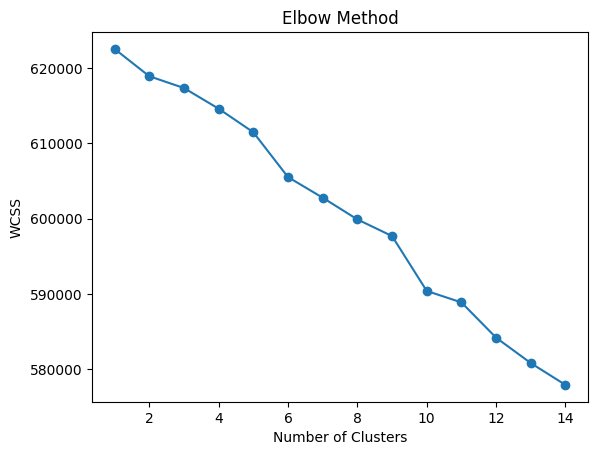

In [ ]:
import matplotlib.pyplot as plt

# Calculate WCSS for a range of cluster counts
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(book_pivot_scaled)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS in KMeans

# Plot the results
plt.plot(range(1, 15), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

# Compute the silhouette score
silhouette_avg = silhouette_score(book_pivot_scaled, book_pivot['cluster'])
print(f'Silhouette Score with k means Clustering with k = 7: {silhouette_avg}')


Silhouette Score with k means Clustering with k = 7: -0.06104395201842833


In [ ]:
from sklearn.cluster import AgglomerativeClustering

agglomerative = AgglomerativeClustering(n_clusters=7)
clusters = agglomerative.fit_predict(book_pivot_scaled)
silhouette_avg = silhouette_score(book_pivot_scaled, clusters)
print(f"Silhouette Score with Agglomerative Clustering(with k = 7): {silhouette_avg}")


Silhouette Score with Agglomerative Clustering(with k = 7): 0.1274207646599676


In [ ]:
# Ensure all column names are strings before scaling and clustering
book_pivot.columns = book_pivot.columns.astype(str)

# Proceed with scaling and clustering
scaler = StandardScaler()
book_pivot_scaled = scaler.fit_transform(book_pivot)

agg_clustering = AgglomerativeClustering(n_clusters=10)
book_pivot['cluster'] = agg_clustering.fit_predict(book_pivot_scaled)


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Step 1: Standardize the data
scaler = StandardScaler()
book_pivotscaled = scaler.fit_transform(book_pivot)

# Step 2: Fit Agglomerative Clustering model
# Set the number of clusters. Experiment to find a suitable number, e.g., 10 clusters.
agg_clustering = AgglomerativeClustering(n_clusters=10)
book_pivot['cluster'] = agg_clustering.fit_predict(book_pivotscaled)

# Step 3: Function to recommend books based on Agglomerative Clustering
def recommend_books_agglomerative(book_name):
    if book_name not in book_pivot.index:
        print(f"The book '{book_name}' does not exist in the dataset.")
        return

    # Get the cluster label for the target book
    book_cluster = book_pivot.loc[book_name, 'cluster']

    # Find other books in the same cluster
    similar_books = book_pivot[book_pivot['cluster'] == book_cluster].index

    # Exclude the target book from recommendations
    recommended_books = [book for book in similar_books if book != book_name]

    print(f"The Agglomerative Clustering recommendations based on '{book_name}' are:")
    for book in recommended_books[:5]:  # Limit recommendations to top 5
        print(book)

# Example usage
recommend_books_agglomerative('4 Blondes')


The Agglomerative Clustering recommendations based on '4 Blondes' are:
1st to Die: A Novel
2nd Chance
A Bend in the Road
A Case of Need
A Child Called \It\": One Child's Courage to Survive"
